In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from IPython.display import display
# path imports
from astropy.coordinates import SkyCoord

from astropath import path
from astropath import localization
from astropath import chance
from astropath import bayesian
# getting functions from helper file
from MPApath_help import *

### Query

wget --http-user=vravi --http-passwd=Oi30KQD --cookies=on --keep-session-cookies --save-cookies=cookie.txt --load-cookies=cookie.txt -O BC03_001.csv "http://gavo.mpa-garching.mpg.de/MyMillennium?action=doQuery&SQL= select c.ra, c.dec, c.Rc, c.diskSize, c.z_geo, g.sfr, g.stellarMass from Henriques2015a.cones.MRscPlanck1_BC03_001 c, Henriques2015a..MRscPlanck1 g where g.galaxyId = c.galaxyId and c.Rc < 40"

## Importing and checking catalog

In [2]:
# Bruzual&Charlot2003 stellar populations 001
cat = pd.read_csv('BC03_001.csv', skiprows=13, skipfooter=1, engine='python')

In [3]:
# making the central ra to 1
cat.loc[cat[cat['ra']<2].index, 'ra'] += 1
cat.loc[cat[cat['ra']>350].index, 'ra'] -= 359
# adjusting stellar mass units
cat.stellarMass = cat.stellarMass / 10**10 * 69
cat

,ra,dec,Rc,diskSize,z_geo,sfr,stellarMass
0,0.080380,0.324768,30.670430,0.140000,7.978514,3.654810,9.120041e-11
1,0.087160,0.330486,29.950586,0.308777,7.978255,1.641616,3.880505e-11
2,0.085080,0.315243,30.216200,0.189541,7.975710,0.639060,1.102080e-11
3,0.379060,0.737658,32.344734,0.455193,8.263824,0.042293,7.293597e-13
4,0.526760,0.851294,31.618252,0.082144,8.407057,0.410910,7.086286e-12
...,...,...,...,...,...,...,...
7761424,1.638170,-0.073044,21.045246,25.995634,0.023062,0.001008,1.156033e-11
7761425,0.771730,0.172814,17.226225,14.172453,0.025457,0.130618,4.081528e-10
7761426,0.348850,-0.112581,22.282263,22.535700,0.032223,0.000359,4.959423e-12
7761427,1.253434,-0.274764,19.541105,2.819328,0.029319,0.011893,7.996850e-11


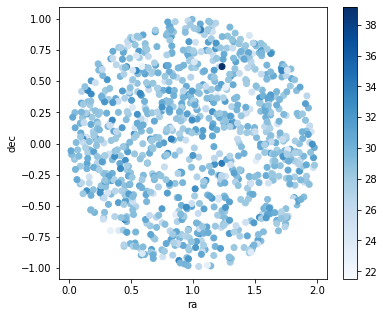

In [4]:
# plotting sample of 1000 galaxies and their magnitudes
ra = cat.ra.sample(n=1000, random_state=122).values
dec = cat.dec.sample(n=1000, random_state=122).values
plt.figure(figsize=(6, 5))
plt.scatter(ra, dec, c=cat.Rc.sample(n=1000, random_state=122))
plt.set_cmap(plt.cm.Blues)
plt.colorbar()
plt.xlabel('ra')
plt.ylabel('dec');
#plt.scatter(frbs.ra, frbs.dec, c='tab:orange', s=5);

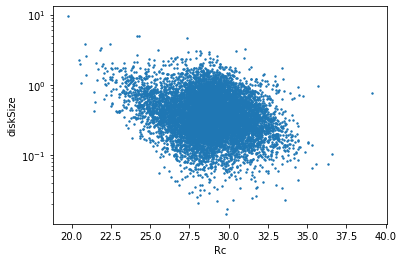

In [5]:
# x vs y plot for different catalog variables
xarr = 'Rc'
yarr = 'diskSize'
plt.scatter(cat[xarr].sample(n=10000, random_state=122).values, cat[yarr].sample(n=10000, random_state=122).values, s=2)
plt.yscale('log')
#plt.xscale('log')
plt.xlabel(xarr)
plt.ylabel(yarr);

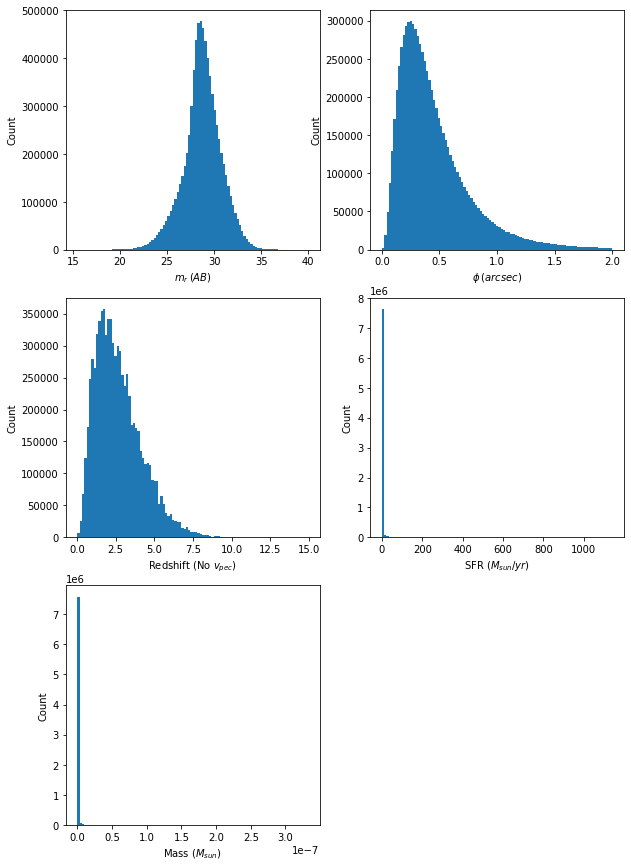

In [6]:
# plotting histograms for different catalog variables
plt.subplots(3, 2, figsize=(10, 15))
plt.subplot(3,2,1)
plt.hist(cat.Rc, 100)
plt.xlabel('$m_r\:(AB)$')
plt.ylabel('Count')

plt.subplot(3,2,2)
plt.hist(cat.diskSize, np.linspace(0, 2, 100))
plt.xlabel('$\phi\:(arcsec)$')
plt.ylabel('Count')

plt.subplot(3,2,3)
plt.hist(cat.z_geo, 100)
plt.xlabel('Redshift (No $v_{pec}$)')
plt.ylabel('Count')

plt.subplot(3,2,4)
plt.hist(cat.sfr, 100)#, np.linspace(0, 2, 100))
plt.xlabel('SFR ($M_{sun}/yr$)')
plt.ylabel('Count');

plt.subplot(3,2,5)
plt.hist(cat.stellarMass, 100)#, np.linspace(0, 2, 100))
plt.xlabel('Mass ($M_{sun}$)')
plt.ylabel('Count');

plt.subplot(3,2,6).axis('off');
#plt.hist(cat.stellarMass, 100)#, np.linspace(0, 2, 100))
#plt.xlabel('Mass ($M_{sun}$)')
#plt.ylabel('PDF');

## Simulating FRBs

In [7]:
# can set conditions on catalog to search through here
#galaxies = cat[np.logical_and(cat.Rc < 23, cat.Rc>20)]
#frbs = sim_frbs(galaxies, 300, 1, ('inverse'), (2., 'uniform'))


frbs = sim_frbs(cat, 1000, 1, ('inverse'), (2., 'uniform'))

In [8]:
stats = multiple_path(cat, frbs, (0.0, 'inverse'), (6, 'exp'), search_rad=7, save=None)
stats

500 1000 

,all_pOx,max_pOx,correct,gal_Index,num_cand
0,"[0.13984171791642025, 0.03071412881860434, 0.7...",0.793308,True,7751986.0,50
1,"[0.014149086448085513, 0.09619170021156724, 0....",0.384207,False,5074784.0,37
2,[0.9996823693977461],0.999682,True,7760837.0,38
3,"[0.012648263369850282, 0.010664694499355325, 0...",0.529287,False,7726150.0,28
4,"[0.010081806523799539, 0.9804419090181754]",0.980442,True,7755936.0,60
...,...,...,...,...,...
995,"[0.037550351744394105, 0.9539579375402011]",0.953958,True,7659089.0,41
996,"[0.14449393642628314, 0.010766485224632503, 0....",0.346409,False,7346818.0,36
997,"[0.029615855324281116, 0.6251693852468344, 0.3...",0.625169,True,7191082.0,35
998,"[0.9610886817838973, 0.013439656532221494]",0.961089,True,7713503.0,38


f(T+secure): 0.32
TP: 0.98
p<.01: 0.89
percentage correct: 0.83


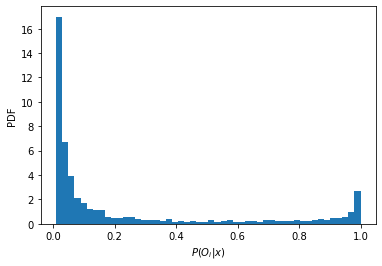

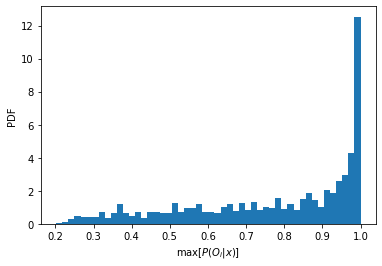

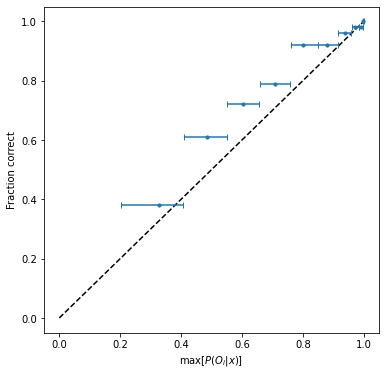

In [9]:
#stats = import_stats('inverse1_inverse1_10000')
analyze(stats);

## Analyzing Candidates

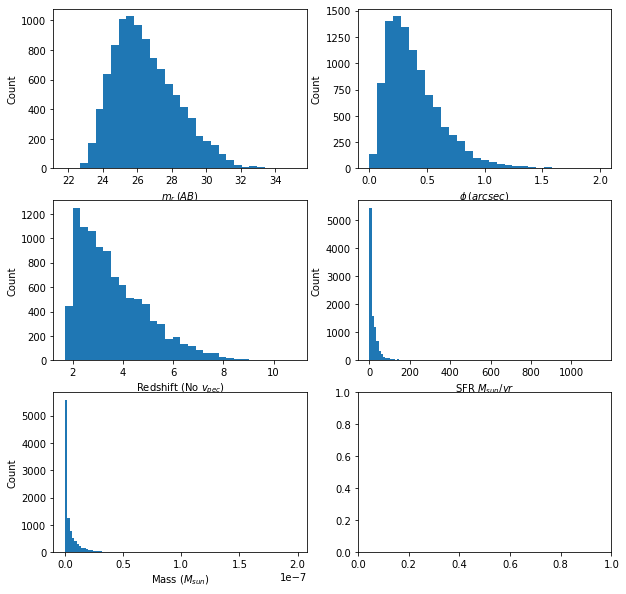

In [152]:
candidate_info = cat.iloc[frbs.gal_Index]

# same histograms as in entire galaxy catalog
plt.subplots(3, 2, figsize=(10, 10))
plt.subplot(3,2,1)
plt.hist(candidate_info.Rc, 30)
plt.xlabel('$m_r\:(AB)$')
plt.ylabel('Count')
plt.subplot(3,2,2)
plt.hist(candidate_info.diskSize, np.linspace(0, 2, 30))
plt.xlabel('$\phi\:(arcsec)$')
plt.ylabel('Count')
plt.subplot(3,2,3)
plt.hist(candidate_info.z_geo, 30)
plt.xlabel('Redshift (No $v_{pec}$)')
plt.ylabel('Count')
plt.subplot(3,2,4)
plt.hist(candidate_info.sfr, 100)#, np.linspace(0, 100, 30))
plt.xlabel('SFR $M_{sun}/yr$')
plt.ylabel('Count');
plt.subplot(3,2,5)
plt.hist(candidate_info.stellarMass, 100)#, np.linspace(0, 2, 100))
plt.xlabel('Mass ($M_{sun}$)')
plt.ylabel('Count');

,ra,dec,Rc,diskSize,z_geo,sfr,stellarMass,pOx
2827432,0.85986,-0.212933,28.008675,0.087425,3.452902,0.445531,2.118196e-11,0.403891
2827658,0.85968,-0.212765,27.916010,0.424428,3.453678,0.319705,1.415375e-10,0.211081
6461172,0.85913,-0.212788,24.532518,0.296363,1.451592,4.102195,1.327723e-09,0.156474


this doesnt matter


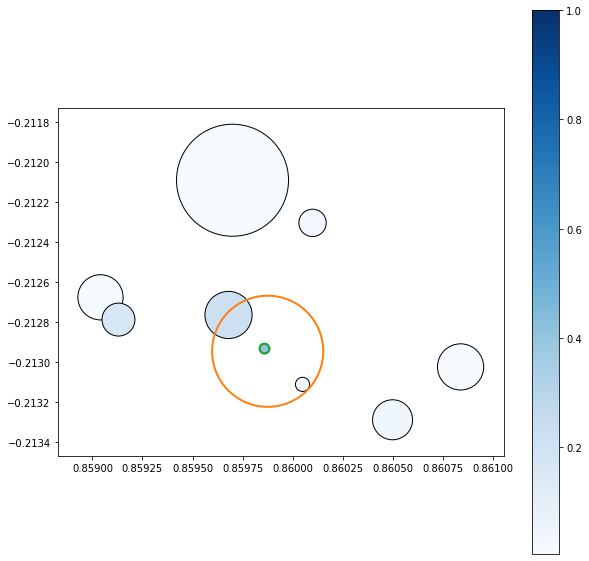

In [11]:
stats = single_path(cat, frbs.iloc[0], (0.9, 'inverse'), (6, 'exp'), search_rad=4, plot=True)